## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import itertools
import cv2
from glob import glob
from PIL import Image
from skimage.feature import greycomatrix, greycoprops
import skimage.measure
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

## Load Images

### List all Folder

In [2]:
image_folders = glob('Dataset/*/')
image_folders

['Dataset\\Apple\\',
 'Dataset\\Banana\\',
 'Dataset\\Grape\\',
 'Dataset\\Limes\\',
 'Dataset\\Mango\\',
 'Dataset\\Peach\\',
 'Dataset\\Pear\\',
 'Dataset\\Strawberry\\']

### List all images in each folder

In [3]:
folder_path = image_folders[0]
folder_name = folder_path.split("\\")[1]
all_image_in_folder = glob(folder_path + "*.jpg")

### List Single Image

In [4]:
img_path = all_image_in_folder[0]
label = folder_name

### Load Single Image

In [5]:
img = Image.open(img_path)

### Display Image

In [6]:
def display(img):
    plt.imshow (img, interpolation = 'nearest')
    _ = plt.axis(False)

### Reshape Image

In [7]:
img_arr = np.array(img)
img_flatten = img_arr.reshape(1, -1).T

### Squeeze Array

In [8]:
img_squeeze = np.squeeze(img_flatten)

## Color Features

### Convert Value

In [9]:
def convert_val_to_rgb(x):
    if x >= 0 and x < 64:
        return "00"
    elif x >= 64 and x < 128:
        return "55"
    elif x >= 128 and x < 192:
        return "AA"
    else:
        return "FF"
    
def convert_val_to_bin(x):
    if x >= 0 and x < 64:
        return 0
    elif x >= 64 and x < 128:
        return 85
    elif x >= 128 and x < 192:
        return 170
    else:
        return 255

In [10]:
img_convert = np.vectorize(convert_val_to_rgb)(img_squeeze)
# img_squeeze = np.vectorize(convert_val_to_bin)(img_squeeze)

In [11]:
img_2d_arr = img_convert.reshape(-1, 3)

### Convert to List

In [12]:
img_list_arr = img_2d_arr.tolist()

### Convert to String

In [13]:
convert_to_str = lambda x:"#"+"".join(list(map(str, x)))
img_str_arr = [convert_to_str(x) for x in img_list_arr]

### Get Frequency of Unique Values

In [14]:
new_arr = np.array(img_str_arr)
np.unique(new_arr, return_counts=True)

(array(['#000000', '#550000', '#555500', '#555555', '#AA0000', '#AA5500',
        '#AA5555', '#AA55AA', '#AAAA55', '#AAAAAA', '#AAFFAA', '#FF5555',
        '#FFAA55', '#FFAAAA', '#FFAAFF', '#FFFFAA', '#FFFFFF'], dtype='<U7'),
 array([ 280, 1073,   75,  182,  675, 2797, 1287,    2,    7,  119,    1,
         233,  227,  276,    1,    4, 2761], dtype=int64))

### Convert Image to Dictionary

In [15]:
tmp_dict = {a:b for (a,b) in zip(np.unique(new_arr, return_counts=True)[0], np.unique(new_arr, return_counts=True)[1])}

### Pipeline Function

In [16]:
def pipeline_1d(img, convert_func, h = 64, w = 64):
    img_resize = img.resize((h,w))
    img_arr = np.array(img_resize)
    img_flatten = img_arr.reshape(1, -1).T
    img_squeeze = np.squeeze(img_flatten)
    img_convert = np.vectorize(convert_func)(img_squeeze)
    return img_convert

### Color Features Pipeline

In [17]:
def pipeline_color(img_arr):
    img_2d_arr = img_arr.reshape(-1, 3)
    img_list_arr = img_2d_arr.tolist()
    convert_to_str = lambda x:"#"+"".join(list(map(str, x)))
    img_str_arr = [convert_to_str(x) for x in img_list_arr]
    new_arr = np.array(img_str_arr)
    tmp_dict = {a:b for (a,b) in zip(np.unique(new_arr, return_counts=True)[0], np.unique(new_arr, return_counts=True)[1])}
    return tmp_dict

### Use OpenCV To Read Image

In [18]:
img = cv2.imread(img_path, -1)
color = ('b','g','r')

### Use OpenCV To Show Histogram

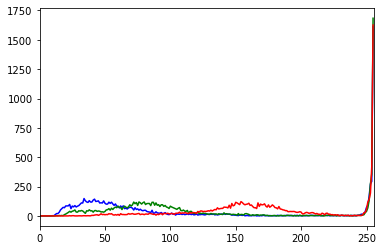

In [19]:
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

### Original Image

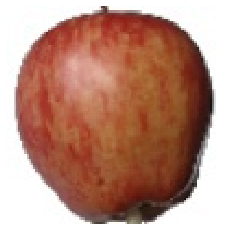

In [83]:
img = Image.open(img_path)
img = np.array(img)
display(img)
img = img.reshape(-1, 3)
tmp_df = pd.DataFrame(img, columns = ["r", "g", "b"])

### Original Image Color Histogram

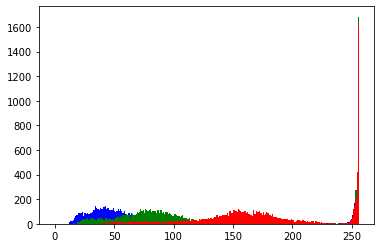

In [21]:
plt.hist(tmp_df["b"],256,[0,256], color="blue")
plt.hist(tmp_df["g"],256,[0,256], color="green")
plt.hist(tmp_df["r"],256,[0,256], color="red")
plt.show()

### New Image

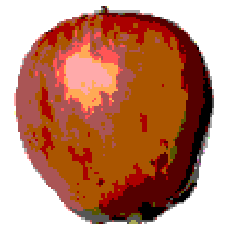

In [22]:
img = Image.open(img_path)
h = w = 100
new_img = pipeline_1d(img, convert_val_to_bin, h, w)
new_img = new_img.astype(np.float32)
new_img = new_img / 255.0
new_img = new_img.reshape(h, w, 3)
display(new_img)

### New Image Color Histogram

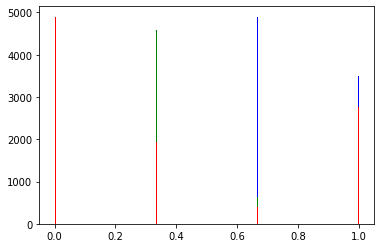

In [23]:
new_img = new_img.reshape(-1, 3)
tmp_df = pd.DataFrame(new_img, columns = ["b", "g", "r"])
plt.hist(tmp_df["b"],256,[0,1], color="blue")
plt.hist(tmp_df["g"],256,[0,1], color="green")
plt.hist(tmp_df["r"],256,[0,1], color="red")
plt.show()

## Texture Features

### Convert New Image to OpenCV Image

In [66]:
cv_img = cv2.imread(img_path)

### Convert Image to GrayScale Image

In [106]:
img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

### Get Mean of Image

In [107]:
mean = np.mean(img_gray)
mean

141.454

### Get Variance of Image

In [108]:
variance = np.var(img_gray)
variance

5469.470684

### Get Entropy of Image

In [109]:
entropy = skimage.measure.shannon_entropy(img_gray)
entropy

6.533803496258811

### Get Gray Level Occurrence of Image

In [110]:
glcm = greycomatrix(img_gray, [2], [0], 256, symmetric = True, normed = True)

### Get Contrast of Image

In [111]:
contrast = greycoprops(glcm, prop="contrast").item()
contrast

937.4746938775509

### Get Homogeneity of Image

In [112]:
homogeneity = greycoprops(glcm, prop="homogeneity").item()
homogeneity

0.24094403325547592

### Get Correlation of Image

In [113]:
correlation = greycoprops(glcm, prop="correlation").item()
correlation

0.9118038523408442

### Get Energy of Image

In [114]:
energy = greycoprops(glcm, prop="energy").item()
energy

0.10123768120925332

### Texture Feature Pipeline

In [115]:
def pipeline_texture(img_gray):
    tmp_dict = {}
    tmp_dict["Mean"] = np.mean(img_gray)
    tmp_dict["Variance"] = np.var(img_gray)
    tmp_dict["Entropy"] = skimage.measure.shannon_entropy(img_gray)
    glcm = greycomatrix(img_gray, [2], [0], 256, symmetric = True, normed = True)
    tmp_dict["Contrast"] = greycoprops(glcm, prop="contrast").item()
    tmp_dict["Homogeneity"] = greycoprops(glcm, prop="homogeneity").item()
    tmp_dict["Correlation"] = greycoprops(glcm, prop="correlation").item()
    tmp_dict["Energy"] = greycoprops(glcm, prop="energy").item()
    return tmp_dict

## Shape Features

In [116]:
def pipeline_shape(img_gray):
    # Apply Gaussian Blur to Image
    img_blur = cv2.GaussianBlur(img_gray, (7,7), 1)

    # Canny Edge Detection
    img_canny = cv2.Canny(img_blur, 50, 150)

    # Edge Detector
    kernel = np.ones((5, 5), dtype = np.uint8)
    img_dilate = cv2.dilate(img_canny, kernel, iterations = 1)

    contours, hier = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area, peri = 0, 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        peri = cv2.arcLength(cnt, True)
    tmp_dict = {}
    tmp_dict["Area"] = area
    tmp_dict["Perimeter"] = peri
    return tmp_dict

### Gray Image

In [118]:
cv_img = cv2.imread(img_path)

# Convert Image to Gray Image
img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

### Get Area of Image

In [119]:
area = pipeline_shape(img_gray)["Area"]
area

1613.5

### Get Perimeter of Image

In [120]:
peri = pipeline_shape(img_gray)["Perimeter"]
peri

637.7716394662857

### Update Final Dictionary

In [126]:
def pipeline_final(img_path, h = 100, w = 100):
    final_dict = {}
    
    # Get Color Features
    img = Image.open(img_path)
    new_img = pipeline_1d(img, convert_val_to_rgb, h, w)
    color_feature_dict = pipeline_color(new_img)
    final_dict.update(color_feature_dict)
    
    cv_img = cv2.imread(img_path)

    # Convert Image to Gray Image
    img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

    # Get Texture Features
    texture_feature_dict = pipeline_texture(img_gray)
    final_dict.update(texture_feature_dict)

    # Get Shape Features
    shape_feature_dict = pipeline_shape(img_gray)
    final_dict.update(shape_feature_dict)
    
    return final_dict

### Get minimum number of images

In [140]:
num_image_arr = []
for folder_path in glob('Dataset/*/'):
    folder_name = folder_path.split("\\")[1]
    all_images = glob(folder_path + "*.jpg")
    num_image_arr.append(len(all_images))
min_num_of_img = min(num_image_arr)

### Append To Dataframe

In [141]:
feature_arr = []

color_feature_arr = []
cc = ["00", "55", "AA", "FF"]
for i in range(4):
    for j in range(4):
        for k in range(4):
            color_feature_arr.append(f"#{cc[i]}{cc[j]}{cc[k]}")
feature_arr += color_feature_arr

texture_feature_arr = ["Mean", "Variance", "Entropy", "Contrast", "Homogeneity", "Correlation", "Energy"]
feature_arr += texture_feature_arr

shape_feature_arr = ["Area", "Perimeter"]
feature_arr += shape_feature_arr

In [142]:
final_df = pd.DataFrame(columns = feature_arr)
final_df

,#000000,#000055,#0000AA,#0000FF,#005500,#005555,#0055AA,#0055FF,#00AA00,#00AA55,...,#FFFFFF,Mean,Variance,Entropy,Contrast,Homogeneity,Correlation,Energy,Area,Perimeter


### Generate CSV (Only Color Features)

In [143]:
h = w = 100
for folder_path in glob('Dataset/*/'):
    folder_name = folder_path.split("\\")[1]
    all_images = glob(folder_path + "*.jpg")
    all_images = all_images[0:min_num_of_img]
    for img_path in all_images:
        feature_dict = pipeline_final(img_path, h, w)
        final_df = final_df.append(feature_dict, ignore_index=True)

### Fill in Nan Values

In [144]:
final_df.fillna(0, inplace=True)

### Add Label

In [146]:
folder_name_arr = [folder_path.split("\\")[1] for folder_path in glob('Dataset/*/')]
label_arr = list(itertools.chain.from_iterable(itertools.repeat(x, min_num_of_img) for x in folder_name_arr))

In [147]:
final_df["Label"] = label_arr

### Shuffle Dataset

In [148]:
df = final_df

In [149]:
df = df.sample(frac=1).reset_index(drop=True)

### Output CSV

In [150]:
df.to_csv("Image_Dataset_Color_Texture_Shape_Features.csv", index = False)

### Generate CSV (After Color Discretization)

In [44]:
# all_img_arr = []
# h = w = 100
# for folder_path in glob('Dataset/*/'):
#     folder_name = folder_path.split("\\")[1]
#     all_images = glob(folder_path + "*.jpg")
#     all_images = all_images[0:min_num_of_img]
#     for img_path in all_images:
#         img = Image.open(img_path)
#         # Get Hex Value Only
#         new_img = pipeline_1d(img, convert_val_to_bin, h, w)
#         all_img_arr.append(new_img)

In [45]:
# df = pd.DataFrame(all_img_arr)
# df.rename(columns={i:f'Pixel {i}' for i in range(h * w *3)}, inplace = True)
# folder_name_arr = [folder_path.split("\\")[1] for folder_path in glob('Dataset/*/')]
# label_arr = list(itertools.chain.from_iterable(itertools.repeat(x, min_num_of_img) for x in folder_name_arr))
# df["Label"] = label_arr

In [46]:
# # Shuffle Dataset
# df = df.sample(frac=1).reset_index(drop=True)

In [47]:
# df.to_csv("Image_Dataset_Color_Features_Float.csv")